In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


<br>
<br>
<br>
<br>
<br>

# Min_Max Scaling: 

<br>
<br>
<br>
<br>
<br>

In [3]:

df = pd.read_csv("dataset/wine_data.csv",usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic Acid']
df.sample(5)

,Class label,Alcohol,Malic Acid
175,3,13.17,2.59
30,1,13.58,1.66
36,1,13.05,1.65
10,1,14.12,1.48
24,1,13.05,2.05


In [4]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  177 non-null    int64  
 1   Alcohol      177 non-null    float64
 2   Malic Acid   177 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


<Axes: xlabel='Alcohol'>

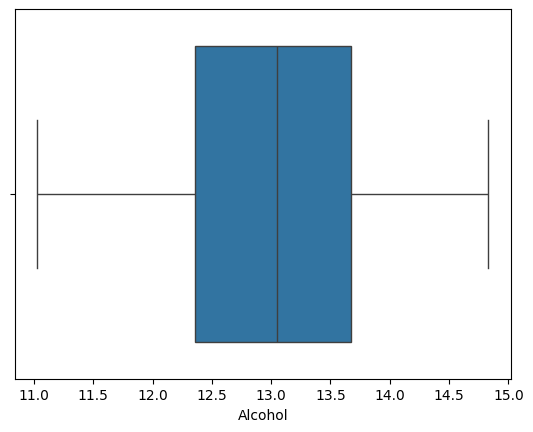

In [13]:
sns.boxplot(data=df,x="Alcohol")

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

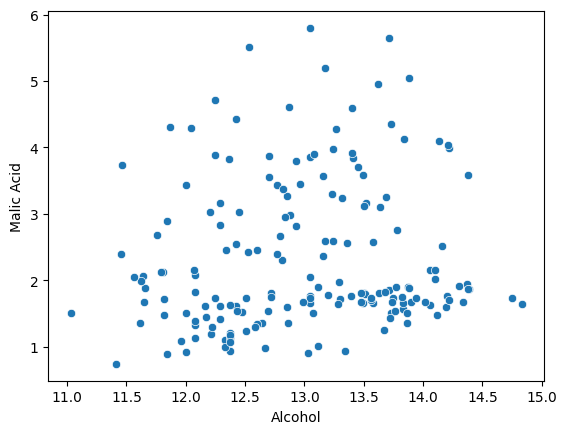

In [15]:
sns.scatterplot(data=df,x="Alcohol",y="Malic Acid")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,1:]
y = df.iloc[:,:1]

X_tarin,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

print(f"size of : X_train : {X_tarin.shape}")
print(f"size of : X_test : {X_test.shape}")
print(f"size of : y_train : {y_train.shape}")
print(f"size of : y_test : {y_test.shape}")


mms = MinMaxScaler()

mms.fit(X_tarin)

X_tarin_sc = mms.transform(X_tarin)
X_test_sc = mms.transform(X_test)

mms.data_max_

size of : X_train : (123, 2)
size of : X_test : (54, 2)
size of : y_train : (123, 1)
size of : y_test : (54, 1)


array([14.75,  5.8 ])

In [20]:

X_tarin_sc = pd.DataFrame(X_tarin_sc,columns=X_tarin.columns)
X_test_sc = pd.DataFrame(X_test_sc,columns=X_test.columns)

X_tarin_sc.describe()


,Alcohol,Malic Acid
count,123.000000,123.000000
mean,0.508021,0.302998
std,0.216637,0.219257
min,0.000000,0.000000
25%,0.344086,0.160079
50%,0.526882,0.211462
75%,0.673387,0.406126
max,1.000000,1.000000


<Axes: title={'center': 'After Scaling: '}, xlabel='Alcohol', ylabel='Malic Acid'>

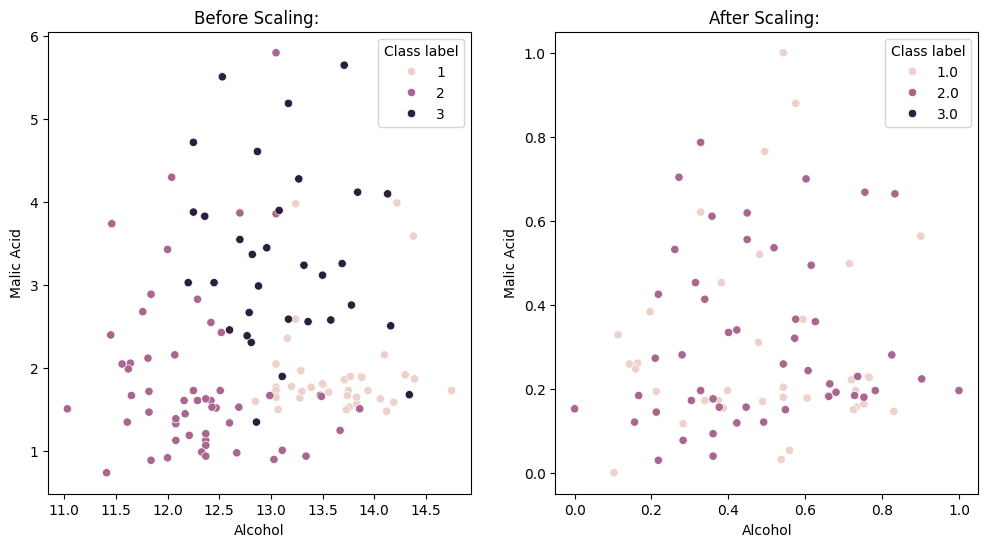

In [26]:

fg,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

ax[0].set_title("Before Scaling: ")
sns.scatterplot(x=X_tarin["Alcohol"],y=X_tarin["Malic Acid"],ax=ax[0],hue=y_train["Class label"])

ax[1].set_title("After Scaling: ")
sns.scatterplot(x=X_tarin_sc["Alcohol"],y=X_tarin_sc["Malic Acid"],hue=y_train["Class label"],ax=ax[1])


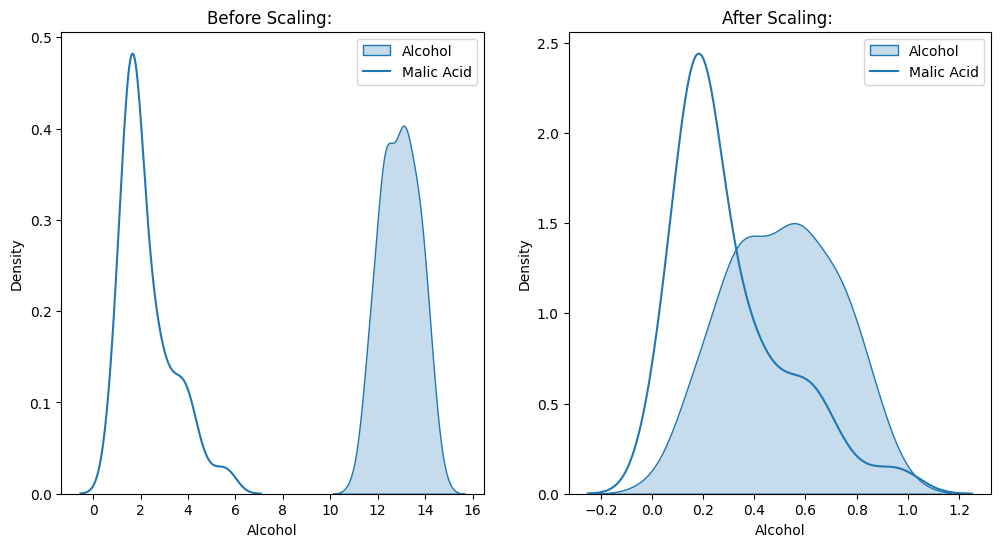

In [30]:

fg,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

ax[0].set_title("Before Scaling: ")
sns.kdeplot(x=X_tarin["Alcohol"],ax=ax[0],label="Alcohol",fill=True)
sns.kdeplot(x=X_tarin["Malic Acid"],ax=ax[0],label="Malic Acid")
ax[0].legend()

ax[1].set_title("After Scaling: ")
sns.kdeplot(x=X_tarin_sc["Alcohol"],ax=ax[1],label="Alcohol",fill=True)
sns.kdeplot(x=X_tarin_sc["Malic Acid"],ax=ax[1],label="Malic Acid")
ax[1].legend()

plt.show()
